In this notebook, show how to convert data between domains. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES']="3"
import tensorflow as tf
from model import cyclegan
import argparse
from utils import *
from glob import glob
import numpy as np

define model hyperparameters.

In [2]:
hparams = tf.contrib.training.HParams(
    dataset_dir='horse2gray',
    epoch=200,
    epoch_step=100,
    batch_size=1,
    train_size=1e8,
    load_size=286,
    fine_size=256,
    ngf=64,
    ndf=64,
    input_nc=3,
    output_nc=3,
    lr=0.0002,
    beta1=0.5,
    which_direction='AtoB',
    phase='train',
    save_freq=1000,
    print_freq=100,
    continue_train=False,
    checkpoint_dir='./checkpoint',
    sample_dir='./sample',
    test_dir='./test',
    L1_lambda=10.0,
    use_resnet=True,
    use_lsgan=True,
    max_size=50,
)


initialize model

In [3]:
# init model
tf.reset_default_graph()
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=tfconfig)
model = cyclegan(sess, hparams)

define utility functions

In [4]:
def load_model(dataset_dir):
    model.dataset_dir = dataset_dir
    model.load(hparams.checkpoint_dir)

def preprocess_image(img, fine_size):
    img = scipy.misc.imresize(img, [fine_size, fine_size])
    img = img/127.5 - 1
    return img

In [5]:
def convert(img, mode):
    if mode == "gray2horse":
        load_model("horse2gray")
        out = sess.run(model.testA, feed_dict={model.test_B: preprocess_image(img, hparams.fine_size)[None,:]})[0] 
    elif mode == "horse2gray":
        load_model("horse2gray")
        out = sess.run(model.testB, feed_dict={model.test_A: preprocess_image(img, hparams.fine_size)[None,:]})[0]
    elif mode == "zebra2horse":
        load_model("horse2zebra")
        out = sess.run(model.testA, feed_dict={model.test_B: preprocess_image(img, hparams.fine_size)[None,:]})[0]
        pass
    elif mode == "horse2zebra":
        load_model("horse2zebra")
        out = sess.run(model.testB, feed_dict={model.test_A: preprocess_image(img, hparams.fine_size)[None,:]})[0]
    else:
        print("please select mode from 'gray2horse', 'horse2gray', 'zebra2horse', 'horse2zebra'")
        return
    return inverse_transform(out)

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


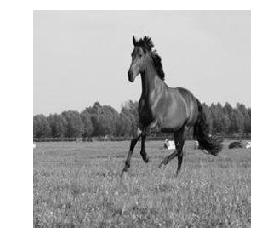

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2gray_256/cyclegan.model-70002


/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


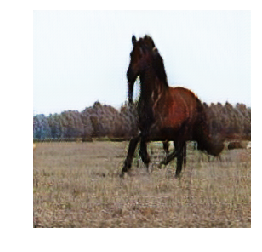

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2zebra_256/cyclegan.model-213002


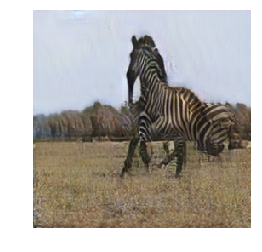

In [54]:
gray_files = glob('./datasets/{}/*.*'.format(hparams.dataset_dir + '/testB')) # gray horse
gray_file = gray_files[2]

# gray to color to zebra
gray_horse = 256-scipy.misc.imread(gray_file, mode="RGB").astype(np.float)
imshow(gray_horse)
color = convert(gray_horse, "gray2horse")
imshow(color)
zebra = convert(color, "horse2zebra")
imshow(zebra)

/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


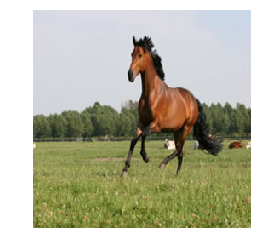

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2gray_256/cyclegan.model-70002


/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


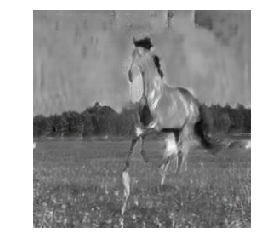

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2zebra_256/cyclegan.model-213002


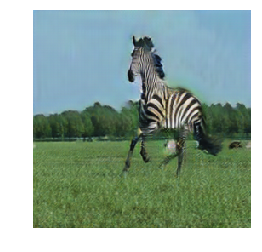

In [53]:
color_files = glob('./datasets/horse2gray/testA/*.*') # horse
color_file = color_files[2]

# color to zebra to gray
color_horse = scipy.misc.imread(color_file)
imshow(color_horse)
gray = 1-convert(color_horse, "horse2gray").astype(np.float)
imshow(gray)
zebra = convert(color_horse, "horse2zebra")
imshow(zebra)

/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


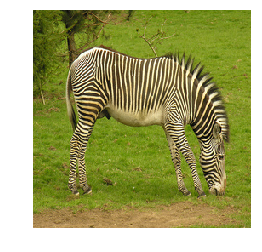

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2zebra_256/cyclegan.model-213002


/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


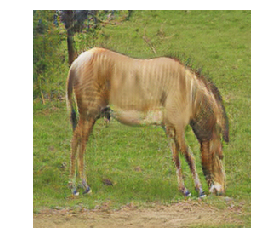

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2gray_256/cyclegan.model-70002


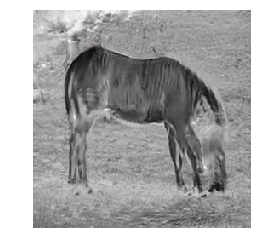

In [35]:
zebra_files = glob('./datasets/horse2zebra/testB/*.*') # horse
zebra_file = np.random.choice(zebra_files)

# color to zebra to gray
zebra = scipy.misc.imread(zebra_file)
imshow(zebra)
horse = convert(zebra, "zebra2horse")
imshow(horse)
gray = convert(horse, "horse2gray")
imshow(gray)